<a href="https://colab.research.google.com/github/tlmartiner/Integracion_de_datos_y_prospectiva/blob/main/2_Caracterizaci%C3%B3n_LDA_POO_Clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caracterización Distribución Agregada de Pérdidas**

Se quiere caracterizar (Media, Desviación, Asimetría, Kurtosis) la distribución agregada de pérdidas como resultado de las pérdidas asociadas a los créditos que posee una FINTECH. Las variables que definen la Loss Distribution Approach (LDA) se obtiene del producto de las siguientes variables:
* Monto (EAD): Es el monto de dinero que una persona solicita a la FINTECH.
* Probabilidad Default (PD): Es la probabilidad de que una persona incumpla el crédito a lo largo de su vigencia.
* LGD (Loss Guarantee Default): La garantia que el solicitante puede colocar sobre el crédito (Carro, Casa, Beca, Finca).

0. Se cargan las librerias de trabajo

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #Para gráfico de distribuciones

from scipy.stats import skew, kurtosis

from google.colab import drive #Conexión Automática con el Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title 1. Método: Histograma de Frecuencias
# Variables de Entrada: Distribución de las Pérdidas
# Variables de Salida: Limite Inferior, Limite Superior, Número de Datos
# Marca de Clase del Histograma de Frecuencias.
def Histx(LDA): #Nombre de su método

  NC=10  #Número de Clusters

  plt.figure()
  sns.histplot(LDA,kde=True,bins=NC,color='red')
  plt.title('Distribución LDA')
  plt.show()

  #Obtenemos la información de la Distribución
  counts, bin_edges=np.histogram(LDA,bins=NC)
  LI=bin_edges[:-1];LS=bin_edges[1:]
  mc=(LI+LS)/2 #El valor representativo de cada intervalo

  return LI,LS,counts,mc

In [ ]:
# @title 2. Caracterización de la Distribución de Pérdidas
def Caractx(e3,e4):

  counts=e3;mc=e4
  u=np.sum(mc*counts)/np.sum(counts) #valor esperado
  varianza=np.sum(counts*(mc-u)**2)/np.sum(counts)
  desviacion=np.sqrt(varianza)

  #Quiero identificar datos raros o outliers
  LIe=u-2*desviacion;LSe=u+2*desviacion
  filas_out=np.where((LDA<LIe)|(LDA>LSe))[0]

  #Coeficiente de Asimetría
  cas=np.sum(counts*(mc-u)**3)/(np.sum(counts)*desviacion**3)
  vcas=(skew(LDA)-cas)/skew(LDA)

  #Coeficiente de Curtosis
  curt=np.sum(counts*(mc-u)**4)/(np.sum(counts)*desviacion**4)-3

  return u,varianza,desviacion,cas,curt,filas_out

In [ ]:
# @title 3. Caracterización de las Pérdidas de la Distribución Agregada
# Variables de Entrada: Media de la LDA
# Variables de Salida: Pérdidas Esperadas, OpVar, Pérdidas Catastróficas,
# Pérdidas No Esperadas.
def Perdx(e5):

  u=e5
  PE=len(np.where(LDA<u)[0])

  OpVar=np.percentile(LDA,99.9)

  PC=len(np.where(LDA>OpVar)[0])

  PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])

  return PE,OpVar,PC,PNE

1. Se cargan los datos

Año 1
Hoja 5


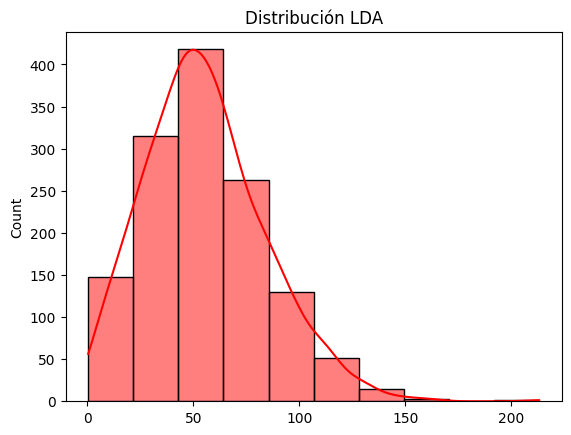

,LI,LS,ND,Perdida
0,0.413092,21.695260,147.0,11.054176
1,21.695260,42.977428,315.0,32.336344
2,42.977428,64.259597,418.0,53.618513
3,64.259597,85.541765,263.0,74.900681
4,85.541765,106.823933,130.0,96.182849
5,106.823933,128.106101,51.0,117.465017
6,128.106101,149.388270,14.0,138.747186
7,149.388270,170.670438,3.0,160.029354
8,170.670438,191.952606,0.0,181.311522
9,191.952606,213.234775,1.0,202.593690


La media de los datos es: 55.91800167999396
La varianza de los datos es: 836.1104127631511
La desviación de los datos es: 28.91557387919443
El coeficiente de asimetría es: 0.5936899030624093
El coeficiente de curtosis: 0.49072605058951346
Los outliers se ubican en: [  16   26   46   81   85  138  190  231  246  292  296  363  371  410
  411  467  475  495  528  571  576  597  602  613  718  796  801  828
  831  837  839  853  854  864  917 1034 1063 1099 1108 1134 1191 1228
 1330]
La pérdida esperada es: 729
Operational Value at Risk (OpVar): 161.29129989014118
La pérdida catastrófica es: 2
La pérdida no esperada: 611
Año 2
Hoja 4


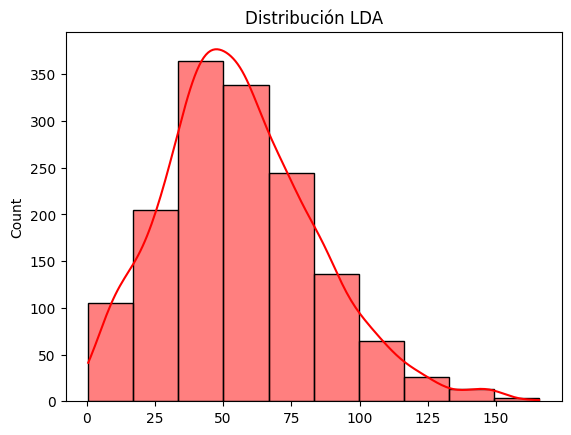

,LI,LS,ND,Perdida
0,0.568346,17.091246,105.0,8.829796
1,17.091246,33.614145,205.0,25.352695
2,33.614145,50.137045,364.0,41.875595
3,50.137045,66.659945,338.0,58.398495
4,66.659945,83.182844,244.0,74.921395
5,83.182844,99.705744,136.0,91.444294
6,99.705744,116.228644,65.0,107.967194
7,116.228644,132.751544,26.0,124.490094
8,132.751544,149.274443,13.0,141.012993
9,149.274443,165.797343,4.0,157.535893


La media de los datos es: 56.36067049807551
La varianza de los datos es: 794.299449263555
La desviación de los datos es: 28.18331863467386
El coeficiente de asimetría es: 0.5398359603970553
El coeficiente de curtosis: 0.2591591450063109
Los outliers se ubican en: [  35  102  122  143  201  254  286  287  398  404  408  446  479  501
  532  559  578  595  648  665  713  726  765  769  793  795  817  822
  829  963  965  992 1007 1046 1105 1160 1215 1231 1232 1243 1283 1290
 1342 1343 1387 1395 1398 1409 1436]
La pérdida esperada es: 813
Operational Value at Risk (OpVar): 149.7093186014969
La pérdida catastrófica es: 2
La pérdida no esperada: 685
Año 3
Hoja 3


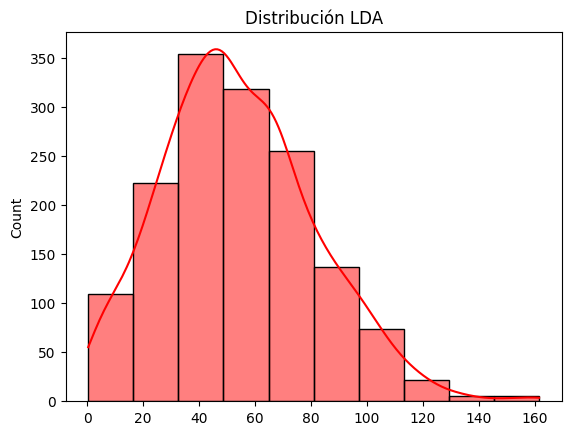

,LI,LS,ND,Perdida
0,0.427835,16.545128,109.0,8.486481
1,16.545128,32.662422,222.0,24.603775
2,32.662422,48.779716,354.0,40.721069
3,48.779716,64.897009,318.0,56.838362
4,64.897009,81.014303,255.0,72.955656
5,81.014303,97.131597,137.0,89.072950
6,97.131597,113.248890,74.0,105.190244
7,113.248890,129.366184,22.0,121.307537
8,129.366184,145.483478,5.0,137.424831
9,145.483478,161.600771,5.0,153.542125


La media de los datos es: 54.35795284724899
La varianza de los datos es: 746.4973760157775
La desviación de los datos es: 27.32210416523181
El coeficiente de asimetría es: 0.46305726633508854
El coeficiente de curtosis: 0.05620072169277224
Los outliers se ubican en: [  18   52   58   63  100  104  122  170  207  237  322  352  369  378
  460  496  503  504  593  599  625  671  731  761  765  782  825  836
  874  885  906  964 1018 1024 1029 1039 1083 1117 1151 1161 1192 1193
 1203 1276 1390 1433]
La pérdida esperada es: 809
Operational Value at Risk (OpVar): 160.70668633158058
La pérdida catastrófica es: 2
La pérdida no esperada: 690
Año 4
Hoja 2


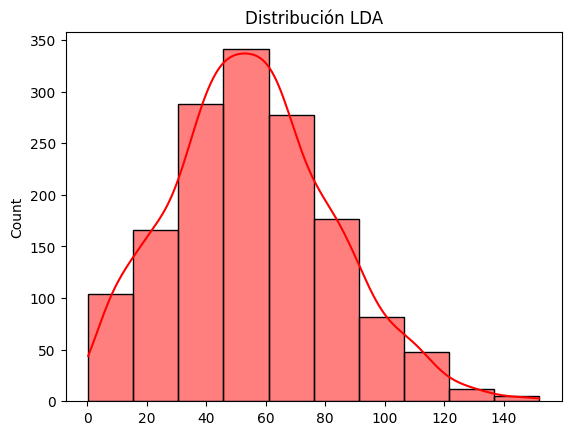

,LI,LS,ND,Perdida
0,0.354255,15.502616,104.0,7.928435
1,15.502616,30.650978,166.0,23.076797
2,30.650978,45.799339,288.0,38.225159
3,45.799339,60.947701,341.0,53.373520
4,60.947701,76.096063,277.0,68.521882
5,76.096063,91.244424,177.0,83.670243
6,91.244424,106.392786,82.0,98.818605
7,106.392786,121.541148,48.0,113.966967
8,121.541148,136.689509,12.0,129.115328
9,136.689509,151.837871,5.0,144.263690


La media de los datos es: 55.66597231387269
La varianza de los datos es: 738.0837467102078
La desviación de los datos es: 27.167696750188593
El coeficiente de asimetría es: 0.33970946303261645
El coeficiente de curtosis: -0.1037825028068542
Los outliers se ubican en: [  25   32   52   71  114  155  259  294  335  342  361  373  386  388
  394  407  435  529  532  537  540  639  660  700  733  735  747  775
  813  829  853  912  916  926  945  948  970  985  998 1016 1048 1049
 1084 1094 1175 1221 1292 1298 1327 1413]
La pérdida esperada es: 781
Operational Value at Risk (OpVar): 147.29776773898615
La pérdida catastrófica es: 2
La pérdida no esperada: 717
Año 5
Hoja 1


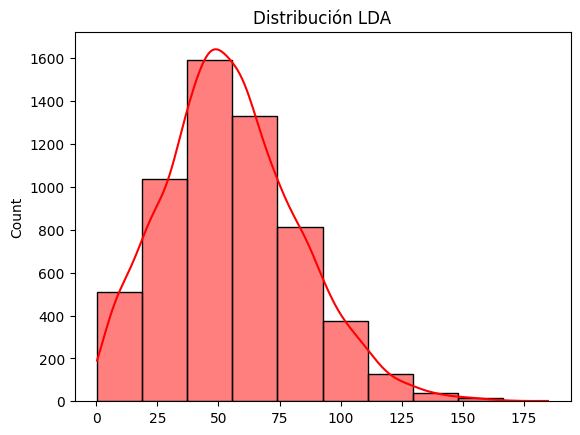

,LI,LS,ND,Perdida
0,0.354255,18.795826,508.0,9.575040
1,18.795826,37.237397,1035.0,28.016612
2,37.237397,55.678969,1594.0,46.458183
3,55.678969,74.120540,1331.0,64.899755
4,74.120540,92.562112,815.0,83.341326
5,92.562112,111.003683,376.0,101.782897
6,111.003683,129.445254,129.0,120.224469
7,129.445254,147.886826,38.0,138.666040
8,147.886826,166.328397,14.0,157.107612
9,166.328397,184.769969,2.0,175.549183


La media de los datos es: 55.42958778365114
La varianza de los datos es: 772.8281796477819
La desviación de los datos es: 27.799787402924178
El coeficiente de asimetría es: 0.47835241166073933
El coeficiente de curtosis: 0.17908847337161227
Los outliers se ubican en: [  25   32   52   71  155  259  294  335  342  361  373  386  388  394
  435  529  532  537  540  639  660  700  733  747  775  813  829  912
  916  926  945  948  970  985 1094 1175 1221 1292 1298 1327 1413 1551
 1557 1586 1596 1603 1612 1621 1669 1672 1765 1790 1812 1821 1851 1868
 1959 1993 2003 2073 2088 2120 2124 2309 2322 2339 2384 2413 2426 2475
 2521 2538 2588 2616 2645 2667 2725 2833 2840 2890 2912 2933 3073 3084
 3152 3175 3224 3287 3302 3366 3384 3428 3431 3460 3479 3497 3512 3532
 3535 3578 3648 3654 3676 3713 3726 3765 3769 3785 3793 3795 3819 3829
 3856 3869 3962 3979 3988 4007 4011 4028 4046 4051 4114 4127 4160 4186
 4229 4231 4232 4243 4260 4272 4290 4311 4343 4356 4359 4387 4390 4395
 4398 4421 4436 4446 4

In [ ]:
# @title 3. Caracterización de las Pérdidas de la Distribución Agregada
# Variables de Entrada: Media de la LDA
# Variables de Salida: Pérdidas Esperadas, OpVar, Pérdidas Catastróficas,
# Pérdidas No Esperadas.
def Perdx(e5):

  u=e5
  PE=len(np.where(LDA<u)[0])

  OpVar=np.percentile(LDA,99.9)

  PC=len(np.where(LDA>OpVar)[0])

  PNE=len(np.where((LDA>=u)&(LDA<=OpVar))[0])

  return PE,OpVar,PC,PNE

nxl='/content/drive/MyDrive/SEMESTRE 9/Integración de datos y prospectiva/Bases de datos/1. SolicitantesCrédito(USD)_Años.xlsx'
m1=0
for k in range(5,0,-1):
  m1=m1+1
  print("Año",m1)
  print("Hoja",k)

  XDB = pd.read_excel(nxl,sheet_name=k)
  LDA = XDB.iloc[:,25]*XDB.iloc[:,33]*(1+XDB.iloc[:,35])
  XDB['LDA']=LDA
  #display(XDB)
  e1,e2,e3,e4=Histx(LDA)

  #Mostrar la tabla con los resultados de la caracterización LDA
  T1=np.column_stack((e1,e2,e3,e4))
  df=pd.DataFrame(T1,columns=['LI','LS','ND','Perdida'])
  display(df)

  e5,e6,e7,e8,e9,e10=Caractx(e3,e4)
  print("La media de los datos es:",e5)
  print("La varianza de los datos es:",e6)
  print("La desviación de los datos es:",e7)
  print("El coeficiente de asimetría es:",e8)
  print("El coeficiente de curtosis:",e9)
  print("Los outliers se ubican en:",e10)

  e11,e12,e13,e14=Perdx(e5)
  print("La pérdida esperada es:",e11)
  print("Operational Value at Risk (OpVar):",e12)
  print("La pérdida catastrófica es:",e13)
  print("La pérdida no esperada:",e14)

2. Caracterización de la Distribución LDA

3. Se obtienen las medidas de dispersión (Asimetría, Kurtosis) y tendencia central (Media, varianza, desviación)

4. Los parametros de riesgo son: Pérdidas Esperadas, Pérdidas No Esperadas, Pérdidas Catastróficas

**Análisis de Resultados**
De los resultados arrojados por el modelo frente a la caracterización de la distribución agregada de pérdidas podemos observar que el Año 2 fue el año que contó con las mayores pérdidas esperadas (813 datos) con una media cercana a los 56.36 USD por evento de pérdida. Este valor fue promovido principalmente por un mayor coeficiente de asimetría el cual se ubico cercano al 0.5. Esta distribución muestra una tendencia a tener pérdidas esperadas mucho mayores que los demás años. Se destaca en la base de datos el Año 3, el cual tuvo un total de eventos de pérdida esperados de 809 eventos, con una media cercana por evento de pérdida con una media de las pérdida de 54.35 USD por pérdida. Es importante mencionar que el aumento en los valor de las pérdidas esperadas, junto con el incremento del coeficiente de asimetría, muestra la gestión de los riesgos que hizo la entidad financiera para esos años. Para los años 1 y año 4 las pérdidas esperadas disminuyeron (781,729), lo que indica que se deben establecer modelos para la gestión de los riesgos con el fin de lograr resultados similares en las pérdidas esperadas similares a los Años 2 y 3.
